In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from data_extraction.extract_trips import extract_trips_from_xlsx

In [3]:
filepath = './trip_chain_reports/10_06_2017.xlsx'

In [4]:
df = extract_trips_from_xlsx(filepath)

Parsing sheet 01
Parsing sheet 02
Parsing sheet 03
Parsing sheet 04
Parsing sheet 06
Parsing sheet 07
Parsing sheet 08
Parsing sheet 09
Parsing sheet 10
Parsing sheet 11
Parsing sheet 12
Parsing sheet 13
Parsing sheet 14
Parsing sheet 16
Parsing sheet 17
Parsing sheet 18
Parsing sheet 19
Parsing sheet 20
Parsing sheet 21
Parsing sheet 22
Parsing sheet 23
Parsing sheet 24
Parsing sheet 25
Parsing sheet 26
Parsing sheet 27
Parsing sheet 28
Parsing sheet 29
Parsing sheet 30
Parsing sheet 31
Parsing sheet 32
Parsing sheet 33
Parsing sheet 34
Parsing sheet 36
Parsing sheet 37
Parsing sheet 38
Parsing sheet 41
Parsing sheet 42
Parsing sheet 43
Parsing sheet 44
Parsing sheet 45
Parsing sheet 46
Parsing sheet 47
Parsing sheet 48
Parsing sheet 49
Parsing sheet 50
Parsing sheet 52
Parsing sheet 53
Parsing sheet 54
Parsing sheet 55
Parsing sheet 56
Parsing sheet 57
Parsing sheet 58
Parsing sheet 59
Parsing sheet 60
Parsing sheet 61
Parsing sheet 62
Parsing sheet 63
Parsing sheet 64
Parsing sheet 

In [5]:
df

,start_time,start_site,start_direction,end_site,end_direction,time,vehicle
0,2017-06-10 00:13:59.000,01,E,01,E,32.50,Car
1,2017-06-10 17:44:23.000,01,E,01,E,53.60,Car
2,2017-06-10 18:37:59.000,01,E,68,W,4.90,Car
3,2017-06-10 17:49:17.000,68,W,57,N,0.35,Car
4,2017-06-10 17:44:44.000,57,N,65,E,2.70,Car
...,...,...,...,...,...,...,...
427316,2017-06-10 19:01:47.000,96,W,85,N,0.47,Car
427317,2017-06-10 19:02:15.200,85,N,86,W,3.72,Car
427318,2017-06-10 19:05:30.200,86,W,86,E,25.45,Car
427319,2017-06-10 19:27:14.000,86,E,85,N,7.07,Car


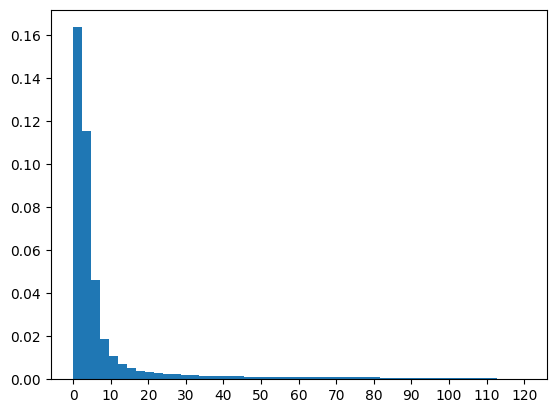

In [10]:
#Plotting histogram of all times
times = df['time'].to_list()

fig, ax = plt.subplots()
ax.hist(x=times,  bins=50, density=True)

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

In [13]:
# Plotting histogram of times in morning peak (7am - 9am)
def convert_timestamp_to_time(timestamp):
    return timestamp.time()

morning_peak_journeys_df = df[
    (df['start_time'].apply(convert_timestamp_to_time) >= datetime.time(hour=7, minute=0, second=0)) &
    (df['start_time'].apply(convert_timestamp_to_time) <= datetime.time(hour=9, minute=0, second=0))
    ]


In [14]:
morning_peak_journeys_df

,start_time,start_site,start_direction,end_site,end_direction,time,vehicle
18,2017-06-10 07:01:53.800,01,W,52,S,2.77,Car
60,2017-06-10 07:46:31.000,01,E,02,N,0.47,Car
61,2017-06-10 07:46:59.200,02,N,01,E,40.02,Car
62,2017-06-10 08:26:32.200,01,E,02,N,0.45,Car
85,2017-06-10 08:54:00.000,01,E,02,N,0.45,Car
...,...,...,...,...,...,...,...
427147,2017-06-10 08:40:04.000,64,S,13,E,0.83,Car
427237,2017-06-10 08:09:36.000,95,W,72,E,54.90,LGV<3.5T
427239,2017-06-10 08:15:57.000,68,E,66,N,54.55,LGV<3.5T
427294,2017-06-10 08:45:33.000,96,E,72,W,2.18,Car


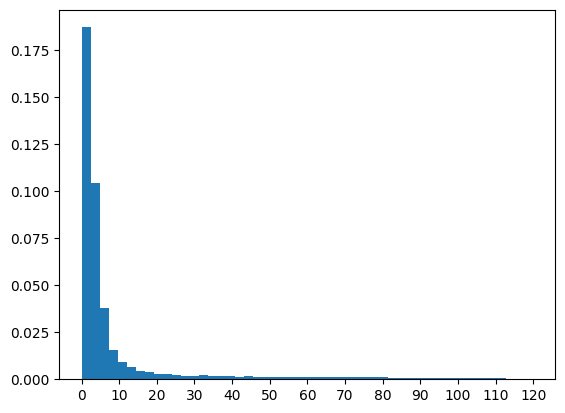

In [15]:
times = morning_peak_journeys_df['time'].to_list()

fig, ax = plt.subplots()
ax.hist(x=times,  bins=50, density=True)

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))

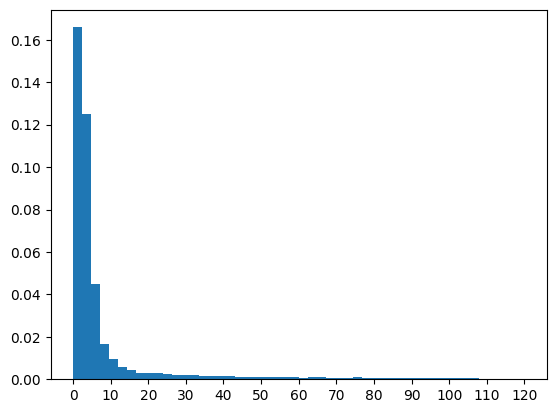

In [16]:
#Plotting histogram of times in evening peak (4:30-6:30pm)

evening_peak_journeys_df = df[
    (df['start_time'].apply(convert_timestamp_to_time) >= datetime.time(hour=16, minute=30, second=0)) &
    (df['start_time'].apply(convert_timestamp_to_time) <= datetime.time(hour=18, minute=30, second=0))
    ]

times = evening_peak_journeys_df['time'].to_list()

fig, ax = plt.subplots()
ax.hist(x=times,  bins=50, density=True)

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))